**DEL 1** **Sammanfattning:**

I den här uppgiften svarar jag på följande frågor och har också med egna analyser. Jag har valt att skriva ut allt på engelska då jag behöver få in engelskan i rutin när jag skriver kod. 

1. Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.

2. Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).
3. 
* a) Beräkna andelen personer i datasetet som har sjukdomen.
* b) Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
* c) Jämför den simulerade andelen med den verkliga andelen i datasetet.

4. Beräkna konfidensintervallet med två olika metoder (t.ex. normalapproximation och bootstrap) och jämför resultaten (VG)
5. Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.
6. Gör en simulering för att undersöka hur säkert ditt hypotes­test är (t.ex. hur ofta testet hittar en skillnad när den finns → power). (VG)

Del 2 – Fördjupning och pipeline

För G ska du göra:
Strukturera koden
Flytta delar av din kod från del 1 till funktioner och moduler.
Skapa minst en klass (t.ex. HealthAnalyzer) som kan utföra någon del av analysen (t.ex. beräkna statistik eller rita grafer).
Linjär algebra i praktiken
Använd numpy eller scikit-learn för en analys som bygger på matriser/vektorer.
Exempel:
En enkel linjär regression för att förutsäga blodtryck från ålder och vikt.
PCA för att hitta mönster i datan.
Utökad analys och visualisering
Lägg till minst en ny analys eller graf som ger en djupare förståelse (t.ex. relationen mellan blodtryck och ålder, eller sjukdomsförekomst per kön).
Dokumentation
Skriv docstrings till dina funktioner/klasser.
Använd markdown-rutor för att förklara vad du gör och varför.

För VG ska du även göra:
Bygg en mer utvecklad klass som kan hantera flera olika analyser eller visualiseringar.
Använd en mer avancerad metod (t.ex. multipel regression) eller en extra visualisering som tydligt förklarar resultaten.
Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.

**Import and clean data**

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy import linalg
import math
from src.moduls import * 
from src.io_utils import *
from src.viz import *
import statsmodels.api as sm

np.random.seed(42)

df = clean_data(read_data("dataset/health_study_dataset.csv"))
df.sample(10)

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
696,697,54,M,179.5,103.7,151.2,5.28,Yes,0
667,668,72,M,172.1,103.4,164.3,5.93,No,0
63,64,32,F,167.0,58.9,129.5,2.81,No,0
533,534,31,M,172.1,55.7,124.8,4.73,No,1
66,67,48,M,185.2,83.0,144.6,5.46,No,1
621,622,57,F,159.0,55.5,162.5,3.72,No,0
346,347,28,M,180.8,88.6,148.1,4.97,No,1
490,491,49,F,171.2,91.1,131.8,6.10,No,0
760,761,41,F,166.2,66.9,142.5,4.48,Yes,0
456,457,48,F,173.5,61.0,140.9,4.66,No,0


**1. Max, min, mean, median of:**
- Age
- Weight
- Height
- Systolic_bp
- Cholesterol


In [2]:
showing_standard_info(df)

,age,weight,height,systolic_bp,cholesterol
Max,90.00000,114.400,200.40000,185.900000,7.88000
Min,18.00000,33.700,144.40000,106.800000,2.50000
Mean,49.42625,73.413,171.84925,149.178625,4.92915
Median,50.00000,73.200,171.35000,149.400000,4.97000


**2. a) Boxplot of weight grouped by sexes**

**Conclusion: Men are heavier than women when comparing:**
- Mean
- Q1 to Q3, where men's interval is higher than women's
- The normalised interval, where the entire interval (excluding outliers) are higher than women
- Funny sidenote, even when looking at the outliers, the low-weight outliers-men are within the women's normal range, and vice versa for the heavier outliers of women, within the normal range of men.

**Motivation of using boxplot for this scenario:** My main motivation is best described from this quoto: *"Boxplots are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers. It is easy to see where the main bulk of the data is, and make that comparison between different groups."*

They do however have some limitations, but for this purpose in this specific boxplot, we won't get any of these.

- Källa: https://www.atlassian.com/data/charts/box-plot-complete-guide



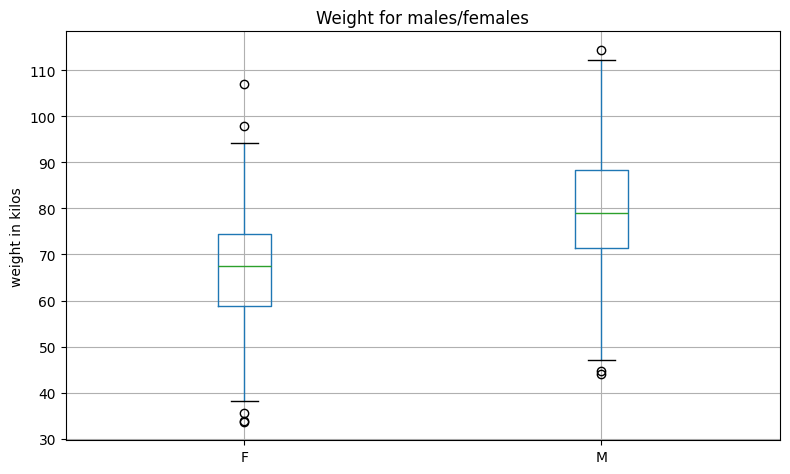

In [3]:
plot_gender_weight_difference(df)

**2. b) Comparing the blood pressure between disease and non-disease people, grouped by sex and smokers**

**Conclusion by only comparing the bars**
- Sick people have, as a group, a higher average bloodpressure than non-sick people in all groups except males who smokes

**Motivation of using barplot:** My choice of barplot is best described with this quote: *"Why Use Bar Plots?
Bar plots are significant because they provide a clear and intuitive way to visualize categorical data. They allow viewers to quickly grasp differences in size or quantity among categories, making them ideal for presenting survey results, sales data, or any discrete variable comparisons."*

And in this case we are comparing different groups (sex and smokers) with the numerical value of systolic bp.

https://www.geeksforgeeks.org/pandas/bar-plot-in-matplotlib/


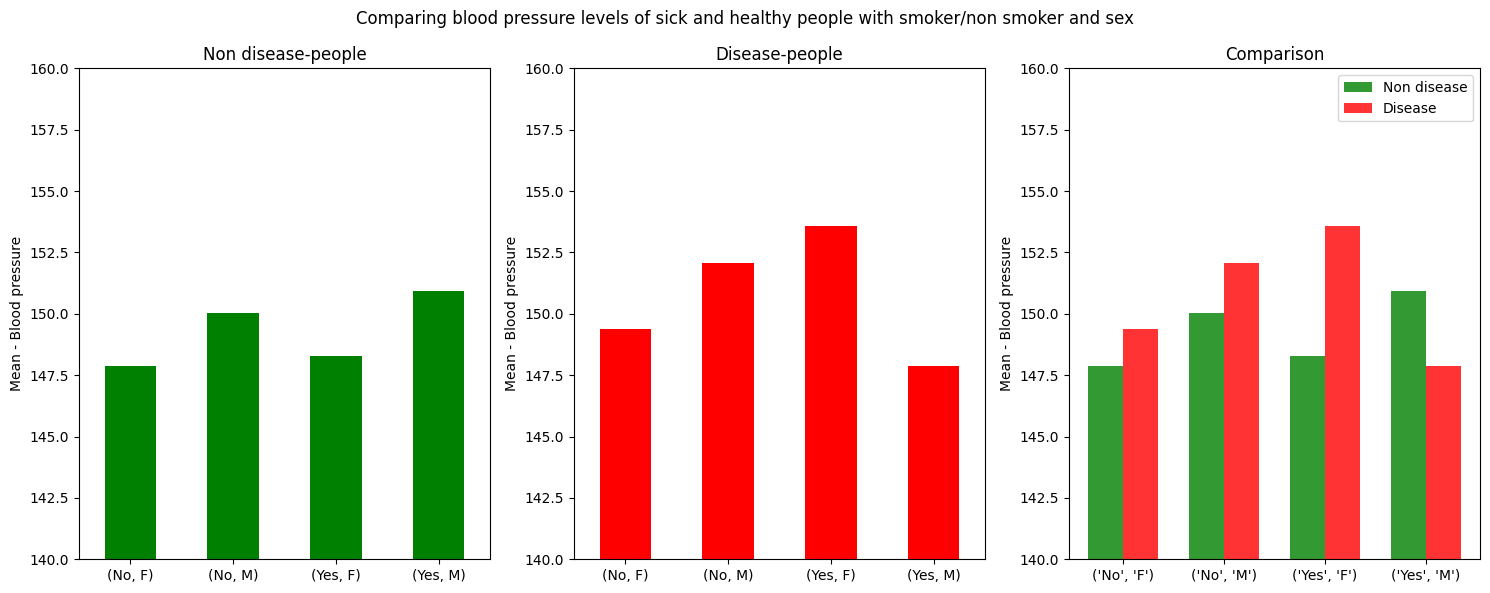

In [4]:
tuple_of_healthy_vs_diseased = healthy_vs_diseased_info(df)
plot_disease_vs_healthy(tuple_of_healthy_vs_diseased[1], tuple_of_healthy_vs_diseased[0])

**2. c) Comparing age with cholesterol between disease and non-disease people**

**Conclusion**
- Too few datapoints from the disease-group to actually tell anything but, but looking at age and cholesterol in it's total it seems like cholesterol raises with age.

**Motivation of using scatter-plot:** Scatter plot is generally the best choice when we have two numerical variables that we want to check against each other's to see if there could be any correlation ( https://online.visual-paradigm.com/knowledge/data-visualization/what-is-scatter-diagram/ ). However, to make things even clearer we can also use linear regression, to make a linear function within our graph that tries to be as close to as many datapoints are possible ( https://www.britannica.com/topic/linear-regression ) which can then be used to make predictions. However, it must be noted that linear regression does not check for any statistical significance, and this is a great example of that, that despite us having only 47 datapoints, it draws the linear function anyway. 

c:\Users\Jakob\Desktop\Github-projekt\Examineringsuppgift\src\viz.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


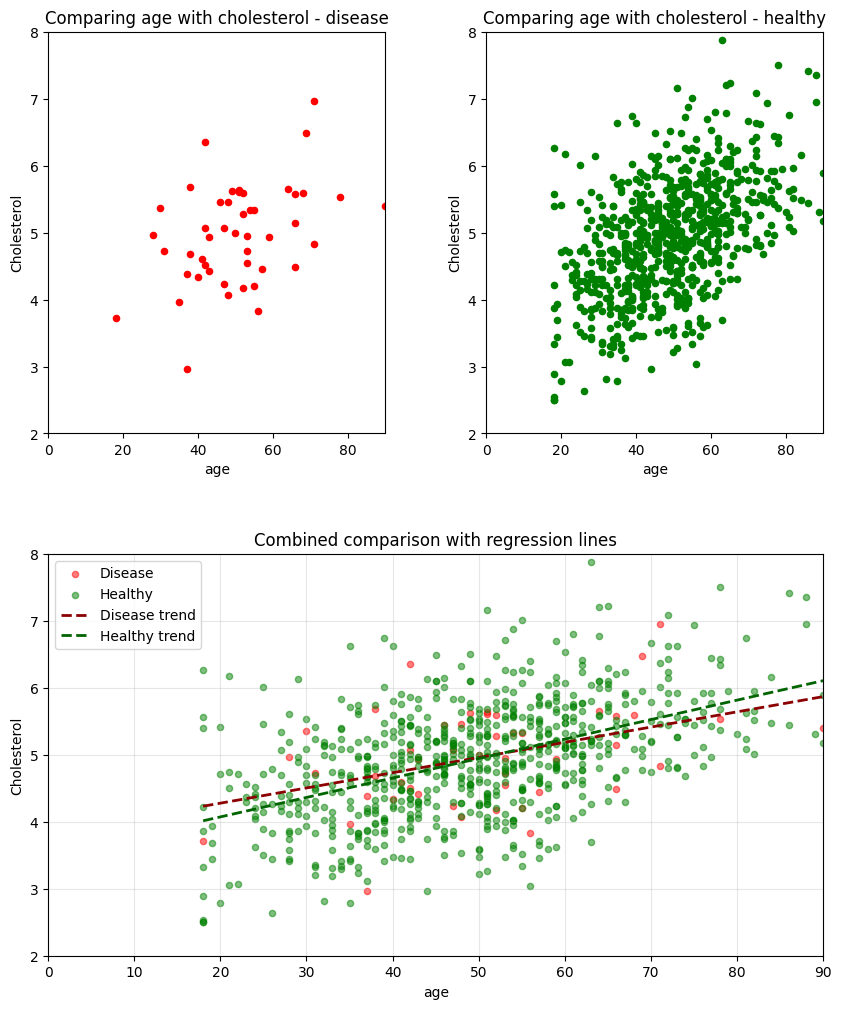

In [5]:
tuple_of_healthy_vs_diseased_mask = healthy_vs_diseased(df)
plot_comparing_age_with_cholesterol(tuple_of_healthy_vs_diseased_mask[0], tuple_of_healthy_vs_diseased_mask[1])

**3. Disease-frequency vs creating a random dataset with the actual disease frequency**

- Blue: Actual disease-frequency
- Yellow: Randomised dataset with the actual frequency in mind
- Red: Difference between the actual and the random frequency

**Motivation of using bar-plot:** Since comparing two categories, one actual and one fictional frequency, we are comparing two groups numerical difference, and that is best plotted with a barplot. See previous motivation from 2 b).

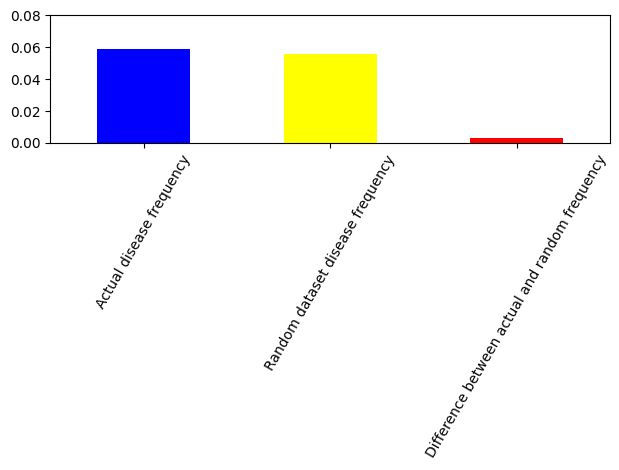

Actual disease frequency                          0.059
Random dataset disease frequency                  0.056
Difference between actual and random frequency    0.003
dtype: float64

In [6]:
df_frequency = actual_frequency_vs_random_generated_frequency(df)
plot_actual_frequency_vs_random_generated_frequency(df_frequency)
df_frequency

**4. CI normal approximation and bootstrap of systolic bp**

**Conclusion**

Both bootstrap and normal approximation shows a very similar result, indicating that normal approximation is in this scenario a robust way of calculating a confidence interval. If the results from the two methods were to differ significantly, it would indicate that the Central Limit Theorem (CLT) is not sufficiently satisfied. Either because our n is too small for the sampling distribution of the mean to be approximated as normal, or because the underlying data distribution is highly non-normal (skewed, heavy-tailed), which the bootstrap method is better equipped to handle.

https://www.youtube.com/watch?v=xjYEYBvPaSc&t=2572s


--Comparing results--

                Method  Lower limit  Upper limit        Mean  Interval width
0  Normalapproximation   148.292090    150.06516  149.178625        1.773069
1            Bootstrap   148.307109    150.07415  149.178625        1.767041

--Differences between methods--
Difference in lower limit: 0.0150
Difference in upper limit: 0.0090
Difference in mean: 0.0000


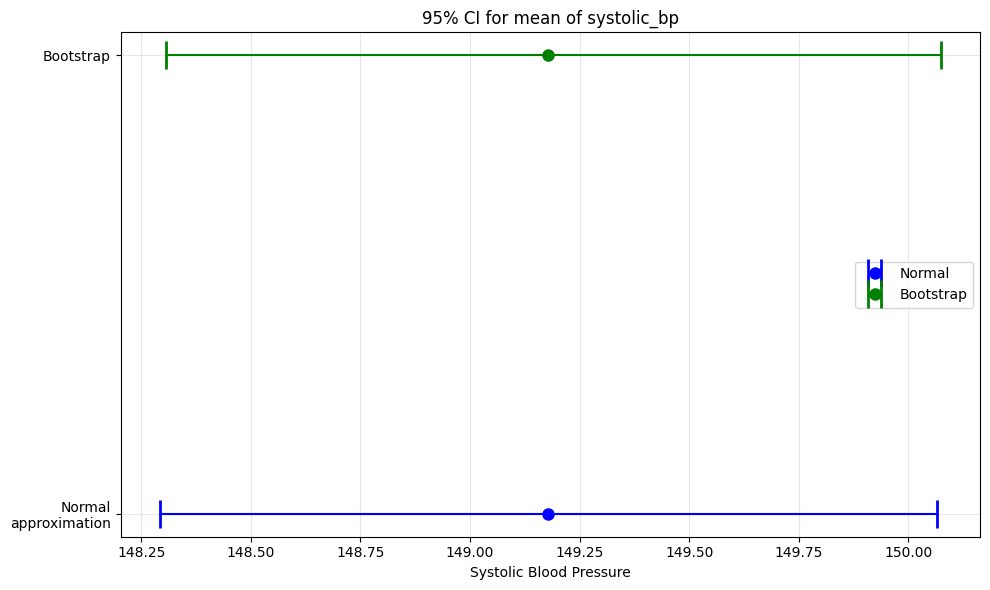

In [7]:
ci_analysis = CI_and_bootstrap(df["systolic_bp"], confidence=0.95)

results = ci_analysis.compare_methods(B=10000)

results

plot_ci_comparison(results)

**Bonus hypothesis-test**: Bloodpressure in healthy vs disease group differs

- *H0: Bloodpressure in healthy and disease-group is the same*
- *H1: Bloodpressure in healthy and disease-group differs*

**Conclusion**

The test didn't find a p-value < 0.05, but rather a p-value > 0.3 which is way too high for a significant result. Therefore, we cannot reject the null hypothesis.

**Motivation of why using a two tail t-test:** We want to find out if there are any markers that could give an indication of a person being sick, and we don't know how the disease affects systolic bp, so therefore we want to first figure out if there is a difference between the disease group and the non disease group at all, and so we use a two tail test t-test to see if the mean of the disease systolic bp is actually, in a statistical significant way, different from that of the healthy group. 

https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/ <-- Theory
https://www.youtube.com/watch?v=jfBuCNus-HY <-- Code

In [8]:
disease, healthy = healthy_vs_diseased(df)

stats.ttest_ind(a=disease["systolic_bp"],
                b=healthy["systolic_bp"],
                equal_var=False)

TtestResult(statistic=np.float64(0.8541835931340537), pvalue=np.float64(0.39695573395339223), df=np.float64(51.54602842475532))

**Bonus power-test: Checking for how often our t-test will actually find a difference if there is one (type 2 error)**

- Power: 0.177 with difference between sick and healthy set to: 2mmHg
- Power: 0.705 with difference between sick and healthy set to: 5mmHg
- Power: 0.849 with difference between sick and healthy set to: 6mmHg
- Difference set to greater than 6 mmHg generates a power well above 0.85, which is considered a valid number.

**Conclusion:** Our previous t-test will not find small differences between the groups (differences between the group of < 6 mmHg), since our datapoints are too few. However, greater differences between the groups will still be found (> 6 mmHg). If we want our t-test to be more refined for finding even small differences, we need to increase our n greatly.

**Motivation of using power-test:** Since we want to find out what kind of differences our previous t-test will actually be able to find, considering our n, we use a power-test so see how many times our t-test finds significant differences, considering the scenario that there actually is a real difference. This is usually a method you want to use before collecting your sample, since it gives an indication of how large our n needs to be. But since we already have our sample, and our t-test couldn't find a significant difference, we want to see for ourselves how refined our t-test actually was.

https://www.youtube.com/watch?v=fmEk4L9IlA8&t=1s


In [9]:
# print(disease.describe())     #<-- To check if the correct n and std have been plugged in
# print(healthy.describe())     #<-- To check if the correct n and std have been plugged in

print(checking_power_of_that_t_test(47,753,13.172255, 12.771772, 2, 0.05, 1000, "two-sided"))
print(checking_power_of_that_t_test(47,753,13.172255, 12.771772, 5, 0.05, 1000, "two-sided"))
print(checking_power_of_that_t_test(47,753,13.172255, 12.771772, 6, 0.05, 1000, "two-sided"))
print(checking_power_of_that_t_test(47,753,13.172255, 12.771772, 8, 0.05, 1000, "two-sided"))
print(checking_power_of_that_t_test(47,753,13.172255, 12.771772, 10, 0.05, 1000, "two-sided"))


--- Simulation Results ---
Assumed true difference (Effect size): 2 mmHg
Sample sizes: Sick=47, Healthy=753
Significance level (Alpha): 0.05

Number of significant results: 177 of 1000
Calculated power (Power): 0.177


(0.177, 2)
--- Simulation Results ---
Assumed true difference (Effect size): 5 mmHg
Sample sizes: Sick=47, Healthy=753
Significance level (Alpha): 0.05

Number of significant results: 705 of 1000
Calculated power (Power): 0.705


(0.705, 5)
--- Simulation Results ---
Assumed true difference (Effect size): 6 mmHg
Sample sizes: Sick=47, Healthy=753
Significance level (Alpha): 0.05

Number of significant results: 849 of 1000
Calculated power (Power): 0.849


(0.849, 6)
--- Simulation Results ---
Assumed true difference (Effect size): 8 mmHg
Sample sizes: Sick=47, Healthy=753
Significance level (Alpha): 0.05

Number of significant results: 978 of 1000
Calculated power (Power): 0.978


(0.978, 8)
--- Simulation Results ---
Assumed true difference (Effect size): 10 mmHg
Sample

**5. Trying hypothesis smokers have higher systolic bp than non smokers**

- H0: Smokers does not have higher systolic bp than non smokers
- H1: Smokers do have higher systolic bp than non smokers

**Conclusion:** p-value = 0.326, which means that we cannot reject our null hypothesis, and cannot conclude that smokers do have higher systolic bp than non smokers. 

**Motivation:** Here, we only want to check if smokers have a higher systolic bp than non smokers, and we therefore only use a one tail t-test, specifically checking the right side of our normal approximation, while also assuming that the two groups variance can differ from one another (welch test). 
Links: https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/ <-- Theory
https://www.youtube.com/watch?v=jfBuCNus-HY <-- Code

In [21]:
smokers, non_smokers = looking_for_them_smokers(df)


result = stats.ttest_ind(a=smokers["systolic_bp"],
                        b=non_smokers["systolic_bp"],
                        equal_var=False,
                        alternative="greater")

print(result)

TtestResult(statistic=np.float64(0.4503433193393224), pvalue=np.float64(0.3263669371699499), df=np.float64(360.15254973870043))


**6. Power-testing the previous t-test**

**Conclusion:** Here, in comparison to our previous power test, we can see that we have a sufficient power of finding a the difference that smokers have a higher systolic bp of greater than 3 mmHg. If the difference is less than 3 mmHg, our test wont have sufficient power, and we might miss the difference. 

**Motivation of using a power-test:** As previously stated, since we couldn't find a significant greater mean of systolic bp when comparing smokers to non smokers, and we already have our sample size, it is logical to see how refined our t-test actually was in finding even small differences. Therefore, we do this power-test.

In checking power of that t-test i use a for loop which uses the basics of a t-test, creating some random datasets, doing t-test and viewing if the result came back as significant. However, there is a better method for this i found at https://docs.scipy.org/doc/scipy//reference/generated/scipy.stats.power.html . This does it faster since it doesn't need to loop 1000 times, but since i'm in the beginnig of my statistical journey, my method is easier to follow for a novice. 





In [11]:
# print(smokers.describe())         #<-- To check if the correct n and std have been plugged in
# print(non_smokers.describe())     #<-- To check if the correct n and std have been plugged in

checking_power_of_that_t_test(213, 587, 13.2678 ,12.626038, 2, 0.05, 1000, "greater")
checking_power_of_that_t_test(213, 587, 13.2678 ,12.626038, 3, 0.05, 1000, "greater")

--- Simulation Results ---
Assumed true difference (Effect size): 2 mmHg
Sample sizes: Sick=213, Healthy=587
Significance level (Alpha): 0.05

Number of significant results: 616 of 1000
Calculated power (Power): 0.616


--- Simulation Results ---
Assumed true difference (Effect size): 3 mmHg
Sample sizes: Sick=213, Healthy=587
Significance level (Alpha): 0.05

Number of significant results: 890 of 1000
Calculated power (Power): 0.890




(0.89, 3)

**Bonus-plot** 

**Notes:** Since having our print in our "checking_power_of_that_t_test" we get some ugly prints when running our plot, since our plot uses the function repeatedly.

**Conclusion:** Here we actually calculate the difference that our t-test will find with a power of 80%, so we find that we will find a difference of 2,5 mmHg.

**Source:** The one and only Joakim -> https://www.youtube.com/watch?v=tAW2Komgulk&t=4164s

--- Simulation Results ---
Assumed true difference (Effect size): 0.0 mmHg
Sample sizes: Sick=213, Healthy=587
Significance level (Alpha): 0.05

Number of significant results: 46 of 1000
Calculated power (Power): 0.046


--- Simulation Results ---
Assumed true difference (Effect size): 0.25 mmHg
Sample sizes: Sick=213, Healthy=587
Significance level (Alpha): 0.05

Number of significant results: 80 of 1000
Calculated power (Power): 0.080


--- Simulation Results ---
Assumed true difference (Effect size): 0.5 mmHg
Sample sizes: Sick=213, Healthy=587
Significance level (Alpha): 0.05

Number of significant results: 124 of 1000
Calculated power (Power): 0.124


--- Simulation Results ---
Assumed true difference (Effect size): 0.75 mmHg
Sample sizes: Sick=213, Healthy=587
Significance level (Alpha): 0.05

Number of significant results: 188 of 1000
Calculated power (Power): 0.188


--- Simulation Results ---
Assumed true difference (Effect size): 1.0 mmHg
Sample sizes: Sick=213, Healthy=587
S

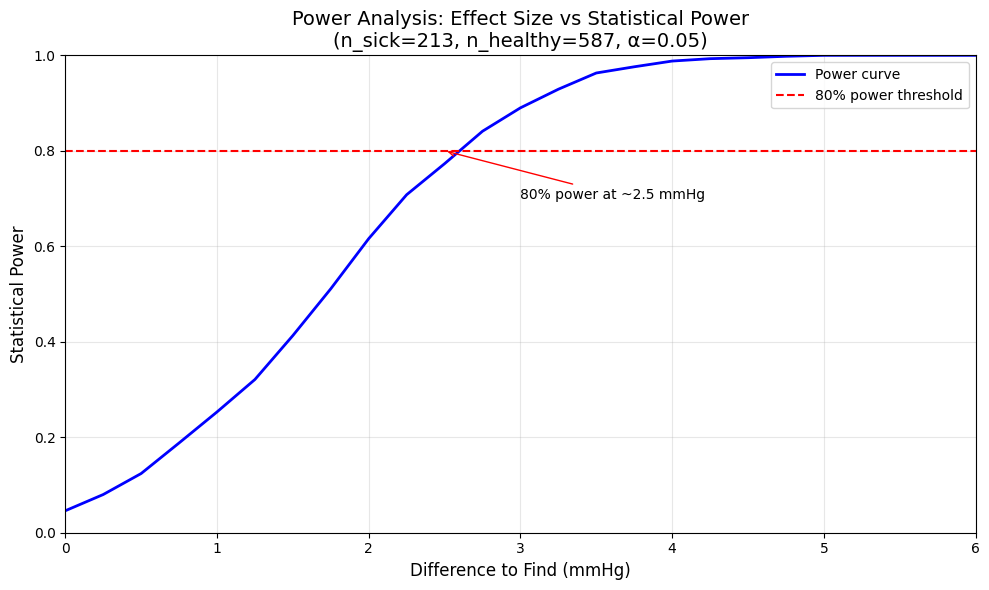


--- Summary ---
Effect size needed for 80% power: ~2.50 mmHg


In [12]:
plotting_power_of_that_t_test(213, 587)

**DEL 2**

Denna del ska kunna köras oberoende av DEL 1

In [13]:
from src.regression_analysis import *

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression 

import matplotlib.pyplot as plt
from scipy import stats
from scipy import linalg
import math
from src.moduls import * 
from src.io_utils import *
from src.viz import *
from src.viz_part2 import *
from src.PCA_and_PCR import *
import statsmodels.api as sm

In [14]:
df = clean_data(read_data("dataset/health_study_dataset.csv"))

**Linear regression**

To see how our numerical variables height, weight, cholesterol and age correlate with systolic bp, we do a linear regression where we are interested in our slope (our linear coefficient which tells us how much our independent variable affects our dependent variable) and our r square value (which tells us how much of the variance in our dependent variable is explained by our independent variable).

Below we see the results of our four linear regressions:
1. Our r squared number is way too low, which can also be seen in the plot (that our dots are quite far away from our linear function). This indicates that height might not have too much to do with systolic bp according to our data.
2. Same problem as previous.
3. Now we have our r-squared value at 0.136 which tells us that cholesterol could actually have something to do with systolic bp, but our r square is still too low.
4. Age and systolic bp get's an r-square value of 0.369, which tells us that age and systolic bp could in fact be correlated. And our slope is 0.54, meaning that for every year you age, your systolic bp generally goes up with 0.54 mmHg.

Our next step is to look at our residual diagnostics, to check if our linear regression is satisfying the neccessary conditions of a linear regression.

**Residual Diagnostics**
- Based on the four plots provided for the regression model, the residual diagnostics indicate that the model meets our conditions required for our linear regression.

1. Residuals vs Fitted Plot (Top Left)
The residuals are randomly scattered around the horizontal line at zero.
*Conclusion: This suggests that the linearity assumption is met, and there is no weird patterns visible.*

2. Normal Q-Q Plot (Top Right)
Most data points closely follow the straight red line.
*Conclusion: This confirms that the residuals are approximately normally distributed, which is a crucial assumption for performing hypothesis tests and calculating confidence intervals.*

3. Scale-Location Plot (Bottom Left)
The points are spread evenly across the range of fitted values, showing no weird pattern.
*Conclusion: This indicates homoscedasticity (that we have constant variance).*

4. Histogram of Residuals (Bottom Right)
The distribution is bell-shaped and symmetric around zero.
*Conclusion: This confirms the finding from the Q-Q plot that the residuals are normally distributed.*

**Source:** 
- https://www.youtube.com/watch?v=iMdtTCX2Q70
- https://www.youtube.com/watch?v=sDrAoR17pNM
- https://youtu.be/ZsJ-DbKpD3s?t=2660
- https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html 
- https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html <-- För att se hur residuals sparas (resid)
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
- https://www.statology.org/standardized-residuals-python/
- Claude and Gemini (helping with the residual diagnostics of Q-Q and scale-location)



    Linear regression:
        Intercept = 129.83
        Slope = 0.11
        R² = 0.007
        


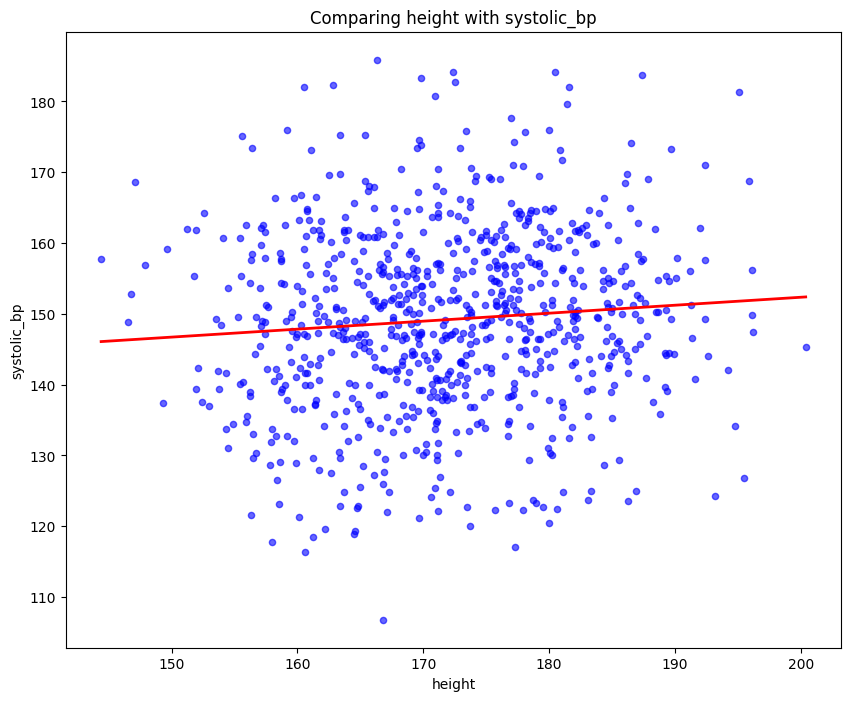


    Linear regression:
        Intercept = 136.86
        Slope = 0.17
        R² = 0.032
        


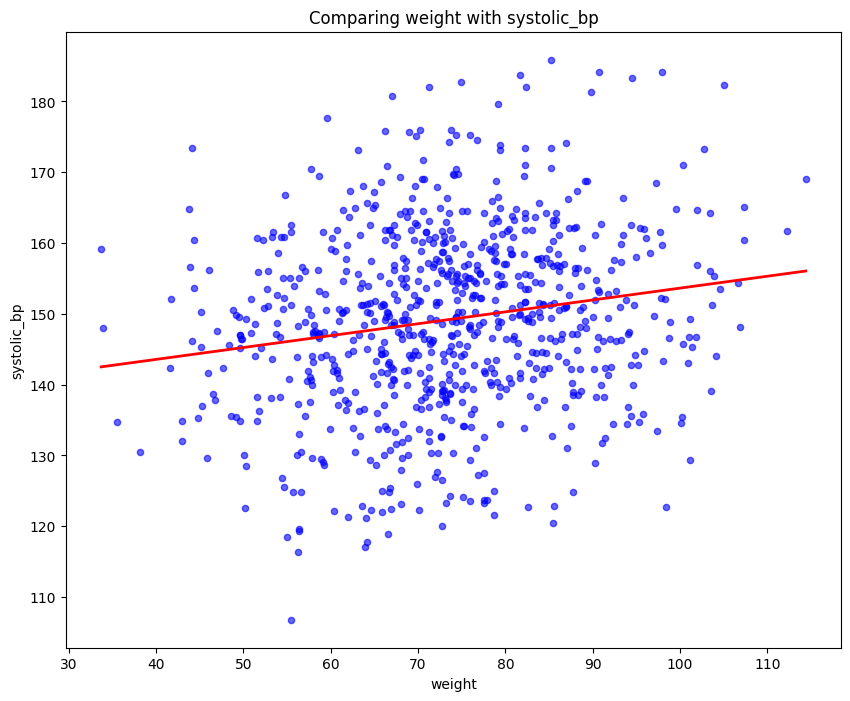


    Linear regression:
        Intercept = 121.79
        Slope = 5.56
        R² = 0.136
        


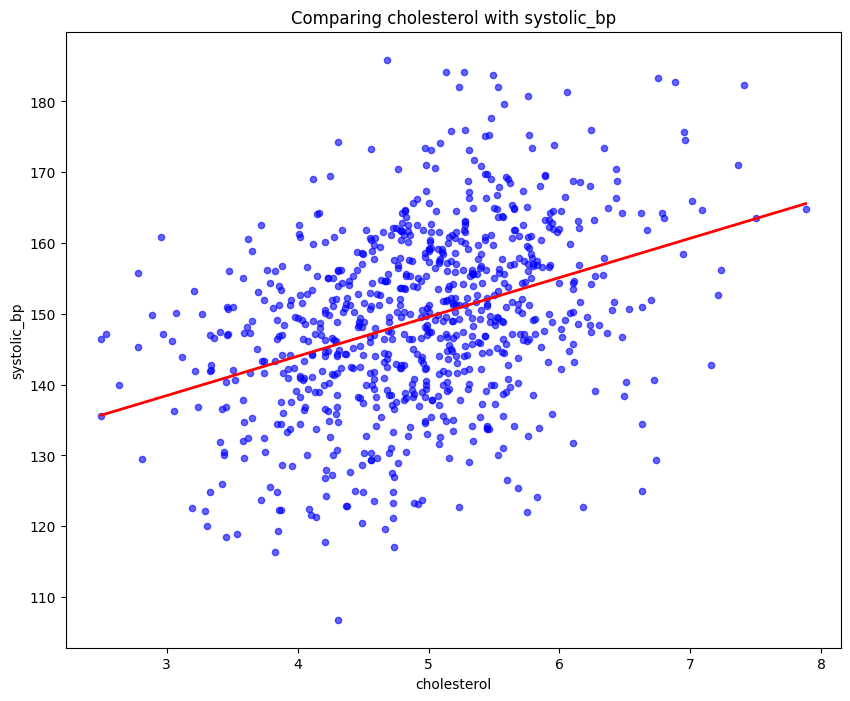


    Linear regression:
        Intercept = 122.68
        Slope = 0.54
        R² = 0.369
        


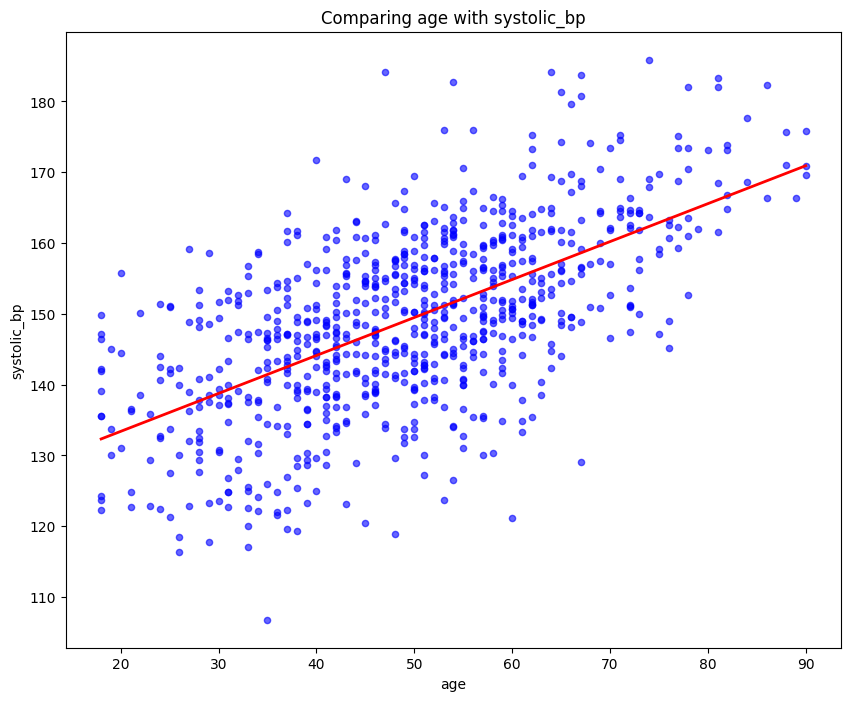

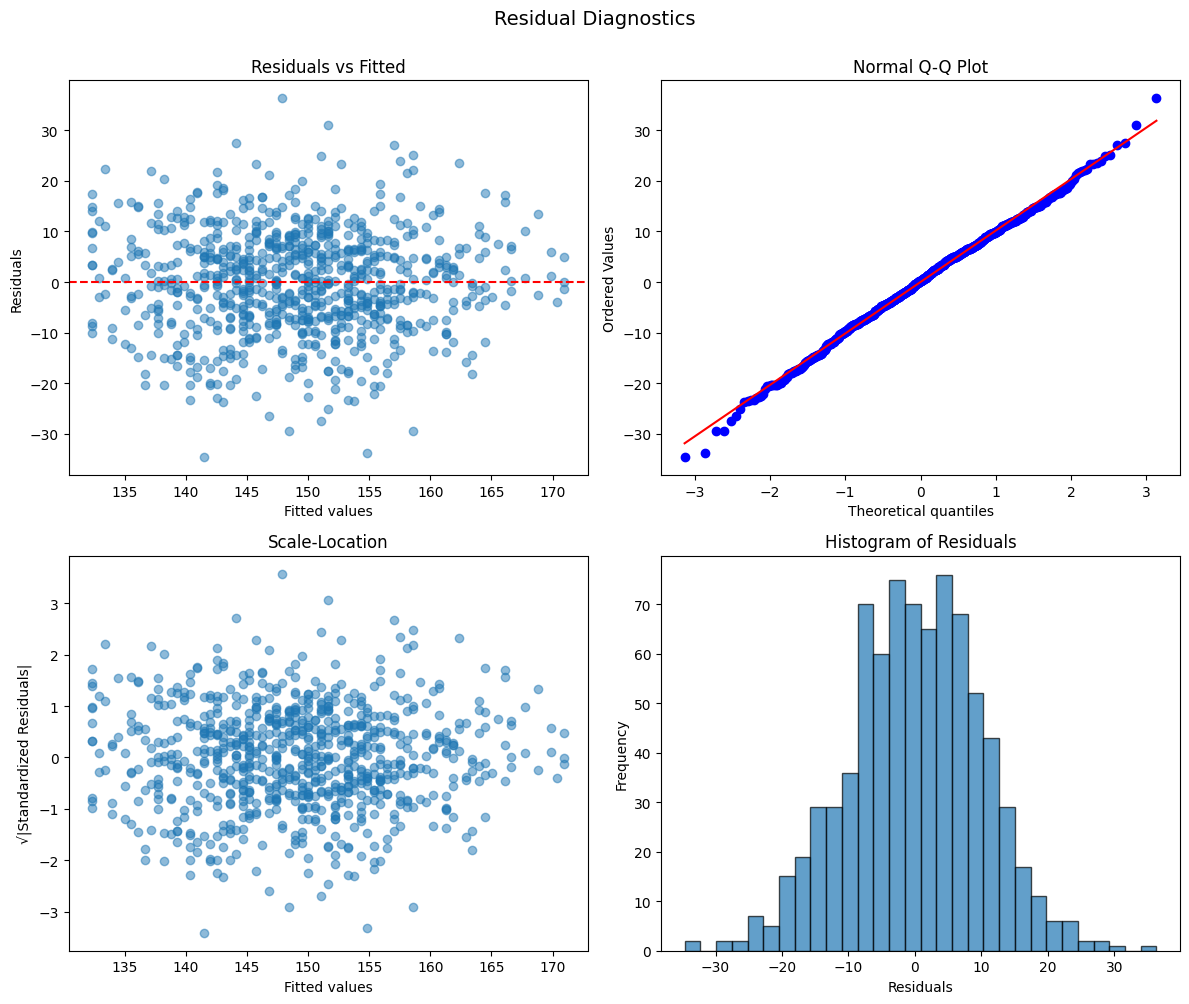

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     467.0
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           6.86e-82
Time:                        12:34:31   Log-Likelihood:                -2989.5
No. Observations:                 800   AIC:                             5983.
Df Residuals:                     798   BIC:                             5992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.6849      1.278     96.024      0.0

In [15]:


use_reg = RegressionAnalysis(df)

slope, intercept, r2, model = use_reg.linear_regression("height", "systolic_bp")
plotting_that_linear_regression(df, "height", "systolic_bp", slope, intercept)

slope, intercept, r2, model = use_reg.linear_regression("weight", "systolic_bp")
plotting_that_linear_regression(df, "weight", "systolic_bp", slope, intercept)

slope, intercept, r2, model = use_reg.linear_regression("cholesterol", "systolic_bp")
plotting_that_linear_regression(df, "cholesterol", "systolic_bp", slope, intercept)

slope, intercept, r2, model = use_reg.linear_regression("age", "systolic_bp")
plotting_that_linear_regression(df, "age", "systolic_bp", slope, intercept)
plot_residual_diagnostics(model)
print(model.summary())

**Multiple linear regression**

To see how our different variables correlate with systolic bp, we do a multiple regression, which isolates one variable at a time and check how that variables unique influence correlates with systolic bp, where we both get a coefficient (how much the isolated variable affects systolic bp) and a p value, which tells us if the correlation is actually significant. 
Before we do a multiple regression we first make our text-based categories "smoker" and "sex" info numerical values, so that we may try these variables as well.

**Result**
- R-squared: 0.407 which means that our multiple regression explains 40.7% of the variance in systolic bp.
- Coefficients: Top 3 variables that have the greatest coefficients (effect) is **age**, **cholesterol** and if you are a **smoker or not**.
- p-value: Looking at the p value, only **age** and **weight** have a p value less than 0.05, which means that we cannot reject our null hypothesis for the variables height, cholesterol, smoker and sex. And our null hypothesis is in this case that there is no correlation between the independent variable and the dependent variable.
- Notes: In the model summary we got this note: *"The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems."* 
Multicollinearity means that some of our independent variables might be affecting the other. For example, height and weight might affect one another and disturb our results in our multiple regression.


**Source:**
- https://www.datarobot.com/blog/multiple-regression-using-statsmodels/ <-- Regression-code
- Claude for fixing a nice print format with β-symbols


In [16]:
pd.to_numeric(df["disease"])

df['sex_numerical'] = 0
df.loc[df['sex'] == 'M', 'sex_numerical'] = 1

df['smoker_numerical'] = 0
df.loc[df['smoker'] == 'Yes', 'smoker_numerical'] = 1

use_reg = RegressionAnalysis(df)
use_reg.multiple_regression("systolic_bp", ["age", "weight", "height", "cholesterol", "smoker_numerical", "sex_numerical"])

Intercept (β₀): 99.9632
age (β1): 0.5238
weight (β2): 0.1604
height (β3): 0.0531
cholesterol (β4): 0.5298
smoker_numerical (β5): -0.3068
sex_numerical (β6): -0.2057

R-squared: 0.4071

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     90.76
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           1.27e-86
Time:                        12:34:31   Log-Likelihood:                -2964.7
No. Observations:                 800   AIC:                             5943.
Df Residuals:                     793   BIC:                             5976.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    

{'coefficients': array([ 9.99631597e+01,  5.23756726e-01,  1.60428645e-01,  5.30854920e-02,
         5.29833229e-01, -3.06764041e-01, -2.05676944e-01]),
 'r2': np.float64(0.40711954645593285),
 'predictions': array([151.76627368, 151.77355074, 156.3350389 , 164.28825024,
        153.53561094, 146.55998373, 164.30719838, 151.5093468 ,
        146.66970029, 152.32813115, 144.94788955, 150.60054735,
        152.92890902, 139.34576781, 138.12814459, 142.83883863,
        140.12120199, 151.62055306, 145.98484288, 140.56310424,
        161.47737025, 149.62307801, 155.19895472, 131.59845642,
        144.00003981, 152.06826105, 145.60907652, 148.21519379,
        147.21678255, 150.66672544, 139.75518873, 164.61900802,
        150.48234568, 145.79767275, 154.7354903 , 135.81397843,
        154.59831654, 135.1088522 , 139.97922488, 152.54529826,
        154.39387772, 149.00985007, 147.65011137, 149.46113612,
        138.89049826, 145.96910428, 142.25506887, 156.83400117,
        152.6308086 , 13

**VIF**

To see how much each independent variable from our previous multiple regression is affected by the other independent variables, we do a VIF (Variance Inflation Factor) to detect multicollinarity. 

**Result**
- Only smoking and sex seems to have a relatively low VIF number, which tells us that those two variables are not or only in a small degree subjected by collinearity of the other independent variables.
- Cholesterol, height, weight and age have an extremely high VIF number, which indicates that those variables can be predicted by the other independent variables and are therefore subjected by collinearity. 


**Source**
- https://www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/ 
- https://www.statology.org/how-to-calculate-vif-in-python/ <--Det mesta av koden, med liten modifikation i ordningen
- https://quantifyinghealth.com/vif-threshold/


In [17]:
use_reg = RegressionAnalysis(df)

use_reg.calculate_vif(["age", "weight", "height", "cholesterol", "smoker_numerical", "sex_numerical"])

use_reg.calculate_vif(["age", "weight", "cholesterol"])



--> VARIANCE INFLATION FACTOR (VIF) <-- Woohooo
           Variable        VIF
0               age  17.318263
1            weight  41.200047
2            height  52.511928
3       cholesterol  48.418027
4  smoker_numerical   1.371340
5     sex_numerical   2.482280

Interpretation:
VIF < 2: Small to none multicollinearity
VIF 5-10: Kind of high and needs to be investigated
VIF > 10: Way too high and now we're beginning to panic
--> VARIANCE INFLATION FACTOR (VIF) <-- Woohooo
      Variable        VIF
0          age  16.560688
1       weight  21.953746
2  cholesterol  40.366643

Interpretation:
VIF < 2: Small to none multicollinearity
VIF 5-10: Kind of high and needs to be investigated
VIF > 10: Way too high and now we're beginning to panic


,Variable,VIF
0,age,16.560688
1,weight,21.953746
2,cholesterol,40.366643


**PCA**

We do a principal component analysis to see which variables we can cluster together to a set of new variables. We also get to see how much of the variance in our dataset is explained by our new PC-variables.

**Result**
- PC1 explains 39% of our datas variance! And the main contributors to PC1 is age and cholesterol. Therefore, we can internally name our PC1 "Age related health-factors"
- PC2 explains 32.4% of our datas variance, and the main contributors here is weight and height. Therefore, we internally name our PC2 "Physical size"
- Together PC1 and PC2 explains 71.3%, which is why we keep only these two PC-components.

So now we have two new variables PC1 (age related health-factors) and PC2 (physical size), which we can do a PCR (Principal component regression) on with our dependent variable systolic bp.

**Source**
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Claude <-- The heavy lifting of this code
- https://www.youtube.com/watch?v=rIKVoHp1HLM <--fit_transform
- https://www.youtube.com/watch?v=HWkM1kH52d8 <-- eigenvalue and eigenvector
- 

In [18]:
pca_vars = ['age', 'height', 'weight', 'cholesterol']

use_pca_or_pcr = PCA_and_PCR(pca_vars, df)

results = use_pca_or_pcr.pca()


Explained variance per component:
PC1: 0.390 (39.0%)
PC2: 0.324 (32.4%)
PC3: 0.187 (18.7%)
PC4: 0.100 (10.0%)

Cumulative variance (PC1 + PC2): 0.713 (71.3%)

Components:
               PC1    PC2    PC3    PC4
age          0.590 -0.367  0.469 -0.545
height       0.167  0.685  0.652  0.279
weight       0.392  0.599 -0.540 -0.443
cholesterol  0.686 -0.193 -0.253  0.654


**PCR (Principal component regression)**

Doing a new regression with our PC variables eliminates the problem of multicollinearity. 

**Result**
- Explained variance by PC1 and PC2 of our total data is 71.3%, which means that PC1 and PC2 together explains the vast majority of the variance in our independent variables variables age, height, weight, cholesterol.
- R-squared: 32.34%, which means that about 32% of our variance in systolic bp is explained by PC1 and PC2. Altought R2 is lower in our multiple regression (about 40%) we know that PC1 and PC2 doesn't have problems with multicollinearity (VIF stable around 1). This is a really good tradeoff!
- Coefficients: PC1 ("Age related health-factors") increases systolic bloodpressure by 5.7 mmHg for every increase of 1 PC1 unit. PC2 on the other hand decreases systolic bloodpressure by 1.26 mmHg for every 1 unit increase of PC2. This tells us that age related health-factors has a positive correlation with a relatively strong effect on systolic bloodpressure (which was expected), while, interestingly, PC2 ("Physical size") has a negative correlation with systolic bloodpressure, meaning that the larger you are as a person, the lower your systolic bloodpressure will be. 

**Analysis** 
- Let's think about what constitutes PC1: age, weight and cholesterol. But what constitutes PC2? Well, there we have height and weight (again), but looking at PC2 we also see a negatively association with age. So even though it was expected that age related health-factors has a positive correlation with systolic bloodpressure, now imagine that PC2 is about a person being large (which we would generally think would lead to a higher systolic bloodpressure), but PC2 is physical size WHEN age has been removed from the equation. So maybe the people within PC2 is well trained, and this leads to a higher systolic bloodpressure. Food for thought!

**Source**
- Same as PCA combined with linear regression


In [19]:
use_pca_or_pcr.pcr("systolic_bp", 2)

--Principal Component Regression (PCR) Result--
Dependent variable (Y): systolic_bp
Independent variables (X): PC1, PC2
--------------------------------------------------
Intercept (β₀): 149.1786
Coefficients (β):
  PC1: 5.7093
  PC2: -1.2616
--------------------------------------------------
Variance explained of 2 components: 0.7132 (71.3%)
R-squared for this beautiful PC-modell: 0.3234
